In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Load Processed Data
df = pd.read_csv("../data/cleaned_data.csv")

In [3]:
# 1. Statistical Summary
print("Statistical Summary:\n", df.describe())

Statistical Summary:
                age          sex     trestbps         chol      thalach  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.354827     0.273973     0.596291   
std       0.189006     0.460373     0.165252     0.117791     0.175616   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.245283     0.194064     0.465649   
50%       0.562500     1.000000     0.339623     0.260274     0.618321   
75%       0.666667     1.000000     0.433962     0.340183     0.725191   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             exang      oldpeak       target         cp_0         cp_1  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      0.336585     0.172825     0.513171     0.484878     0.162927  ...   
std       0.472772     0.189503     0.500070     0.500015     0.369479  ..

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   float64
 1   sex          1025 non-null   int64  
 2   trestbps     1025 non-null   float64
 3   chol         1025 non-null   float64
 4   thalach      1025 non-null   float64
 5   exang        1025 non-null   int64  
 6   oldpeak      1025 non-null   float64
 7   target       1025 non-null   int64  
 8   cp_0         1025 non-null   float64
 9   cp_1         1025 non-null   float64
 10  cp_2         1025 non-null   float64
 11  restecg_0.0  1025 non-null   float64
 12  restecg_1.0  1025 non-null   float64
 13  slope_1      1025 non-null   float64
 14  slope_2      1025 non-null   float64
 15  ca_0         1025 non-null   float64
 16  ca_1         1025 non-null   float64
 17  ca_2         1025 non-null   float64
 18  ca_3         1025 non-null   float64
 19  thal_1

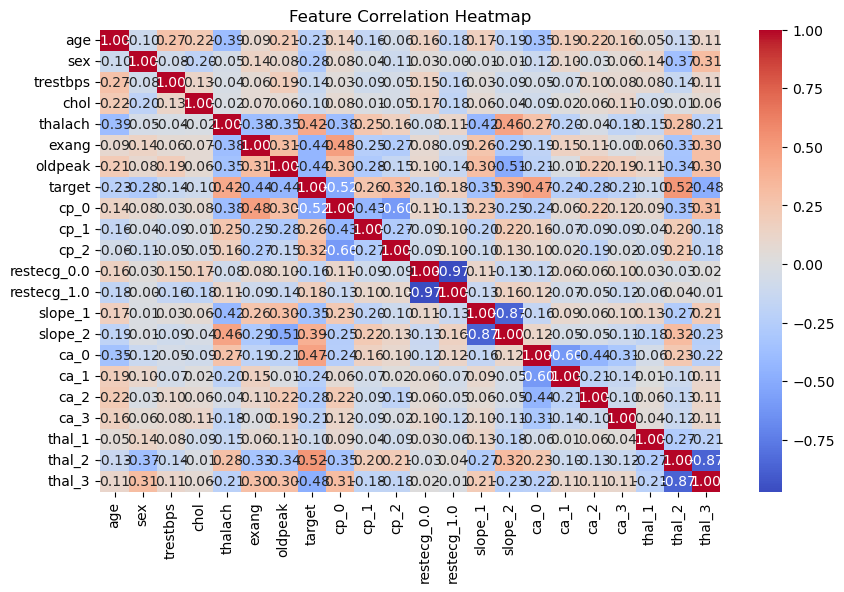

In [5]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

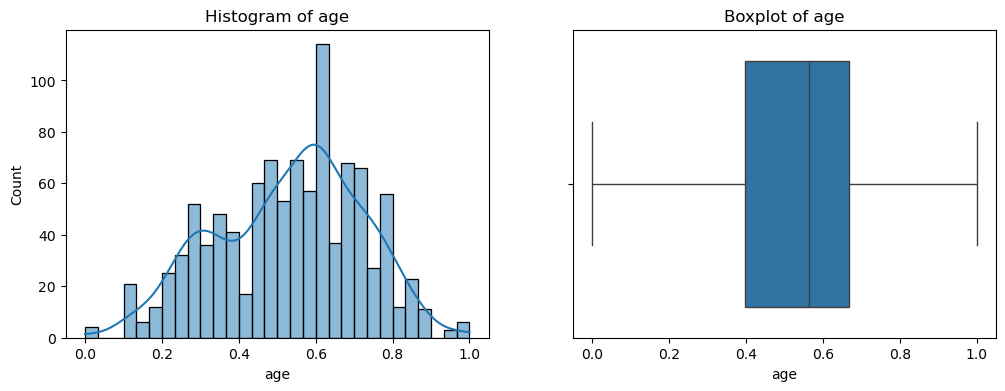

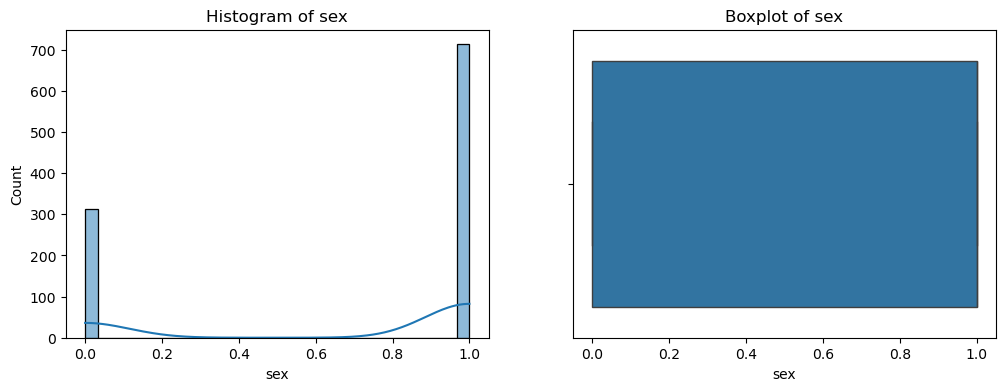

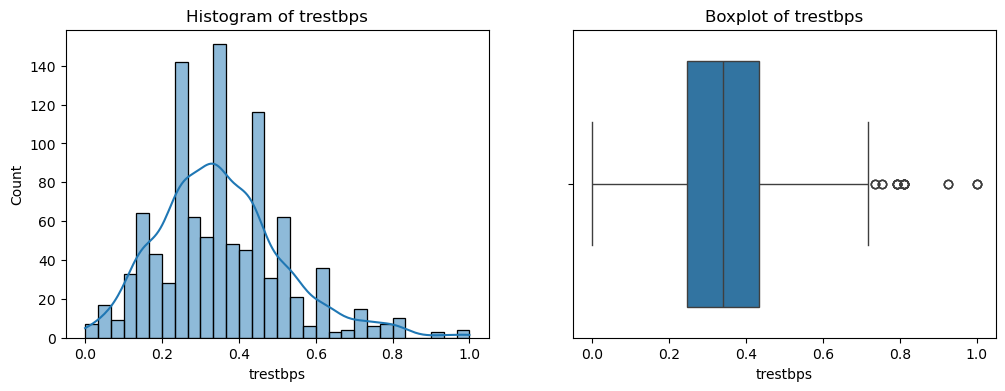

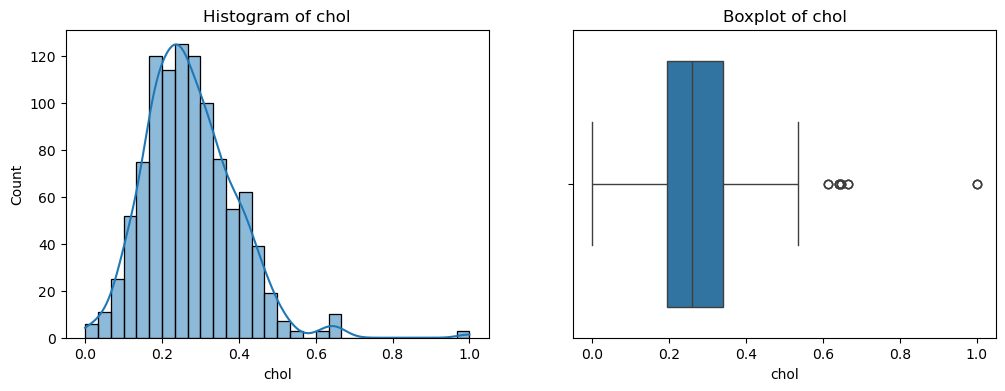

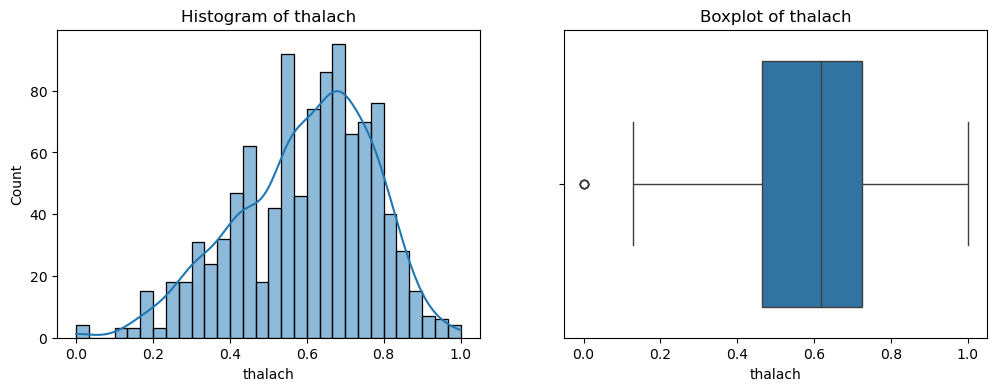

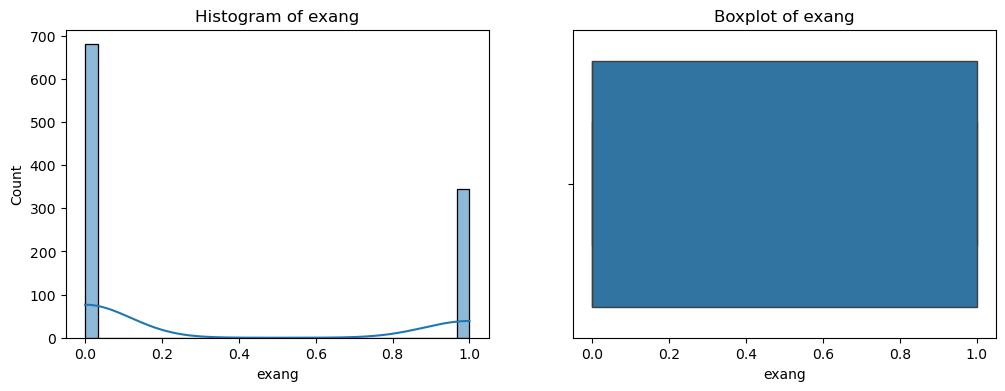

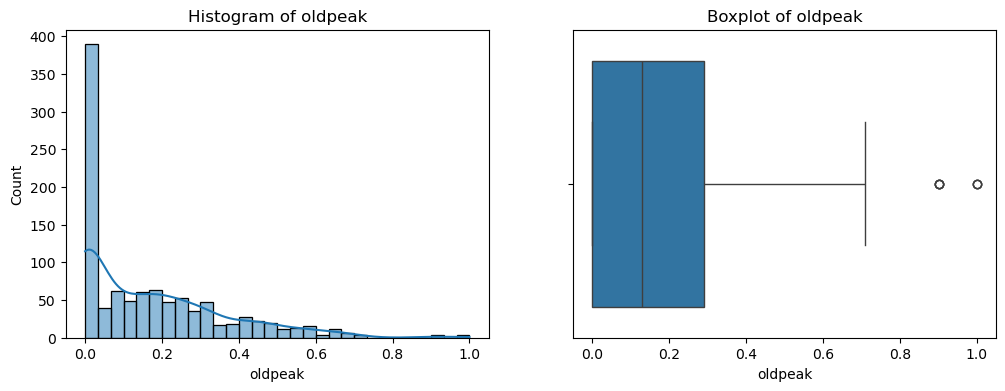

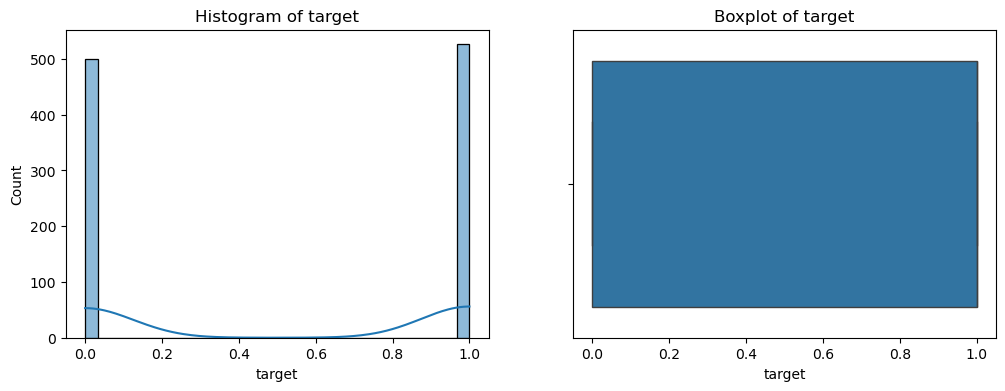

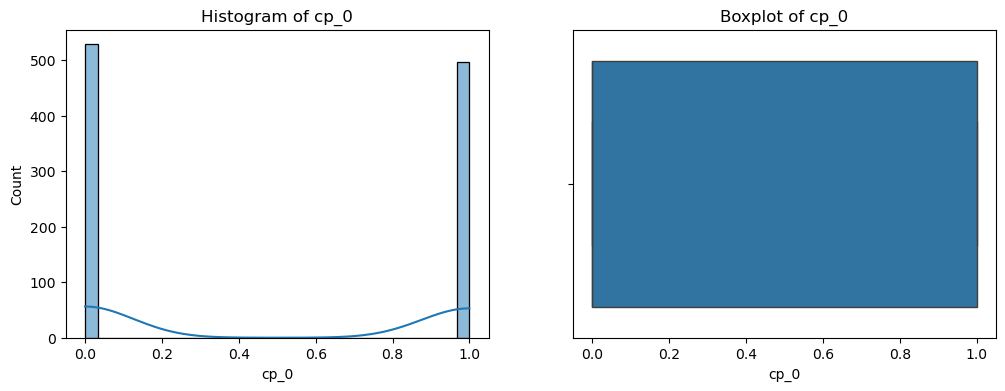

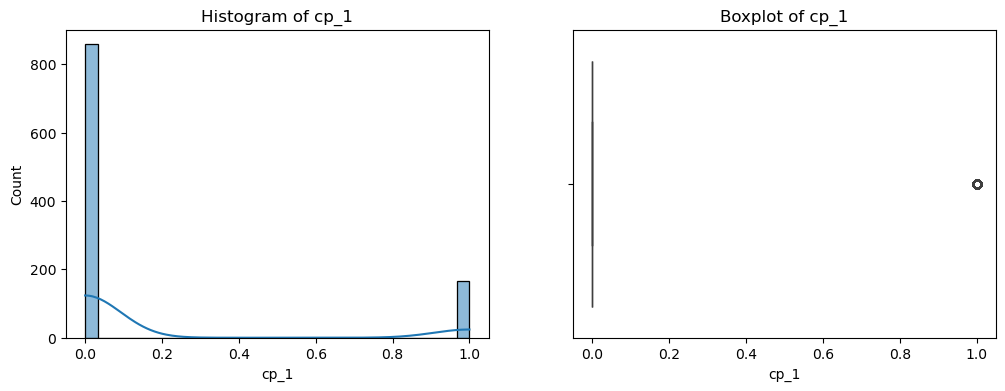

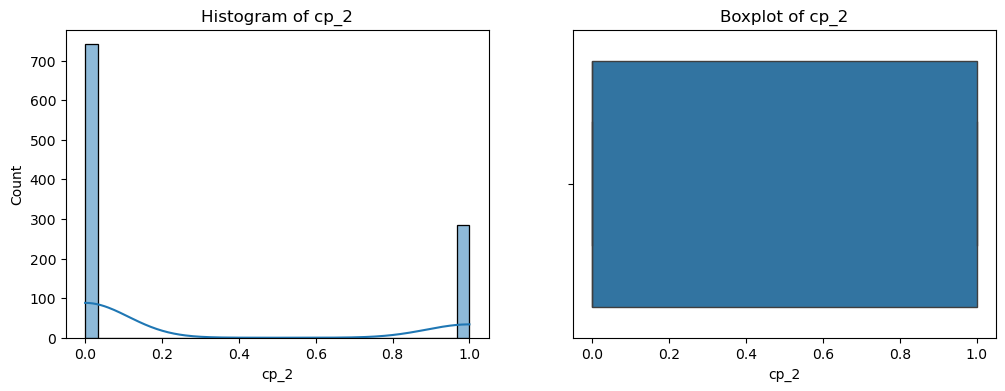

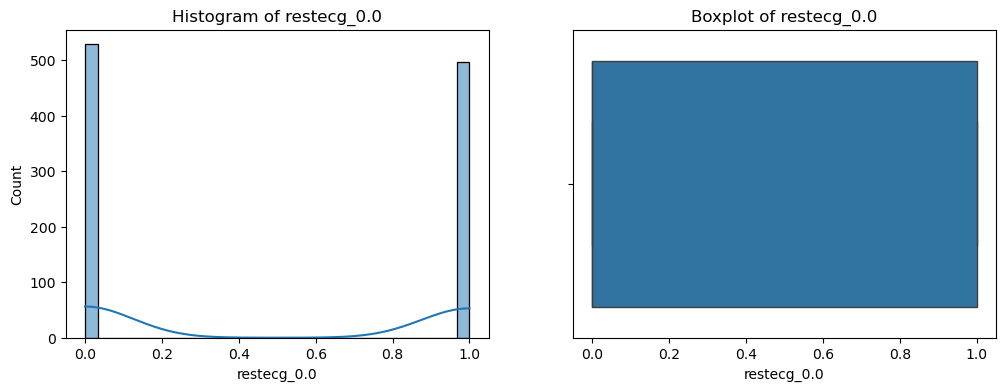

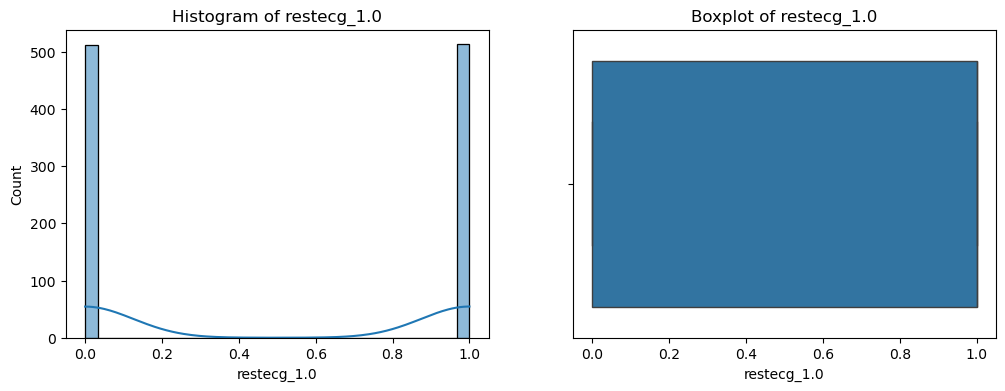

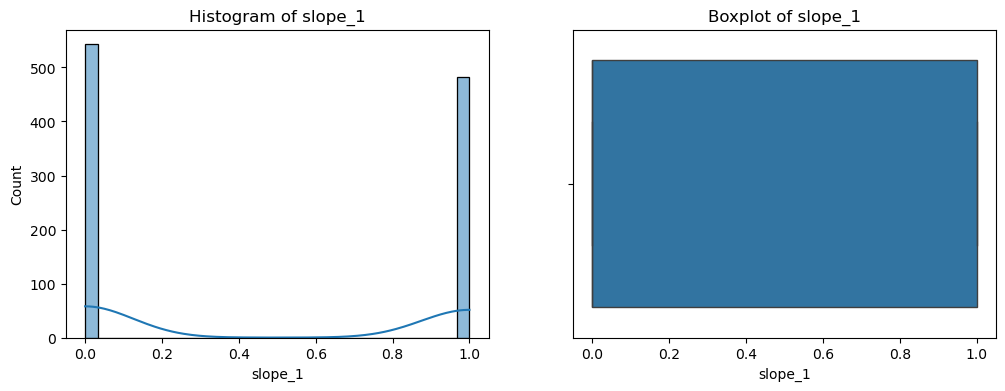

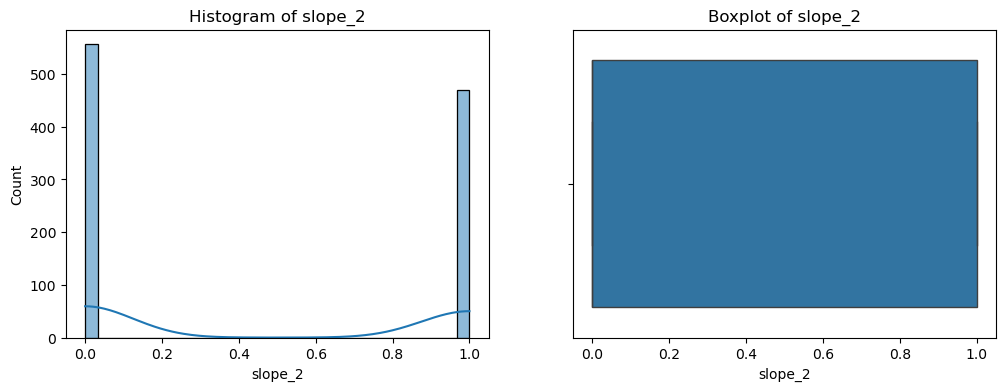

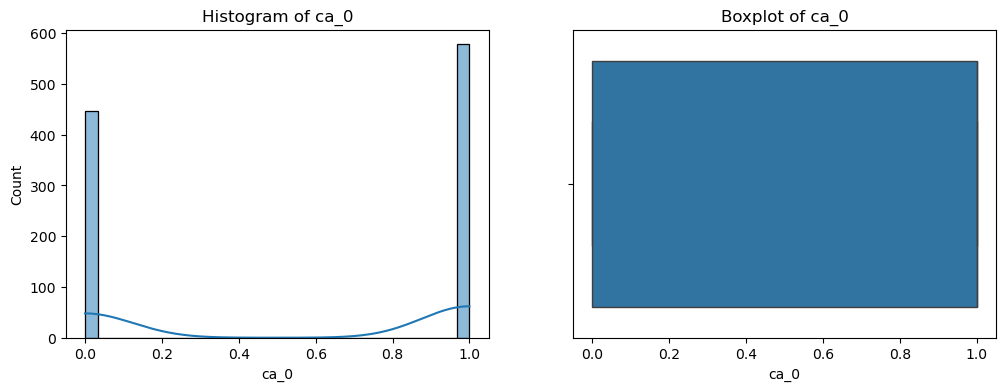

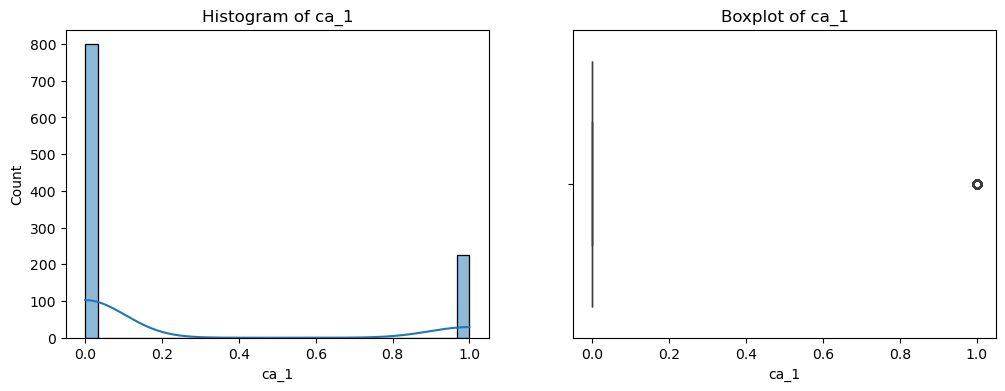

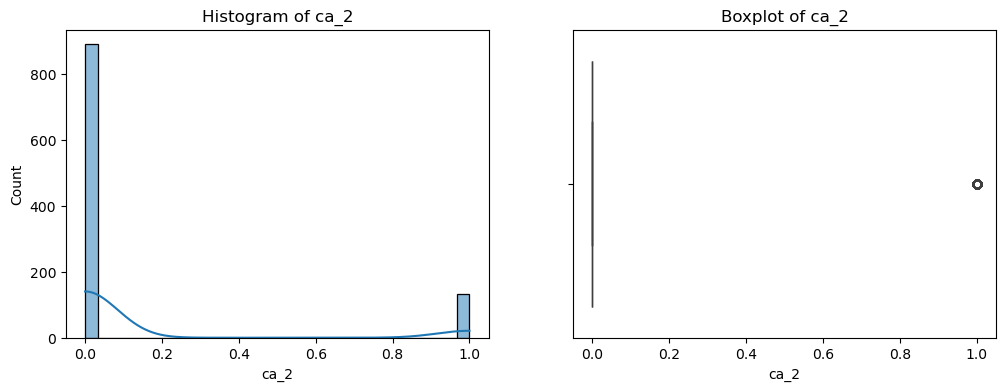

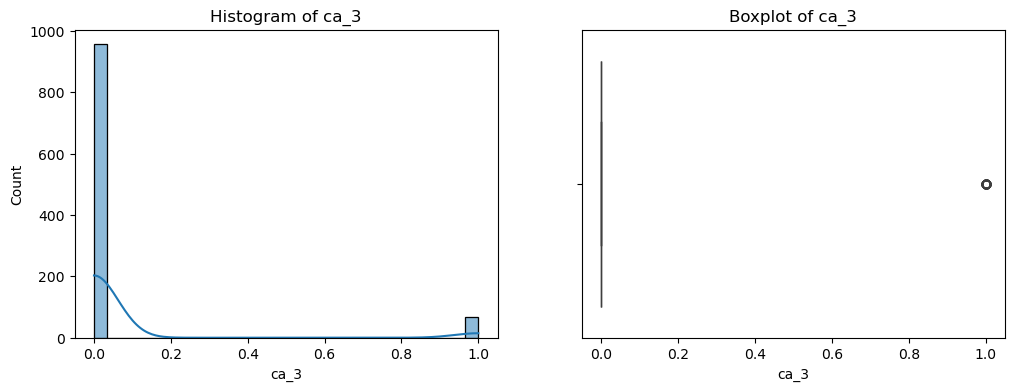

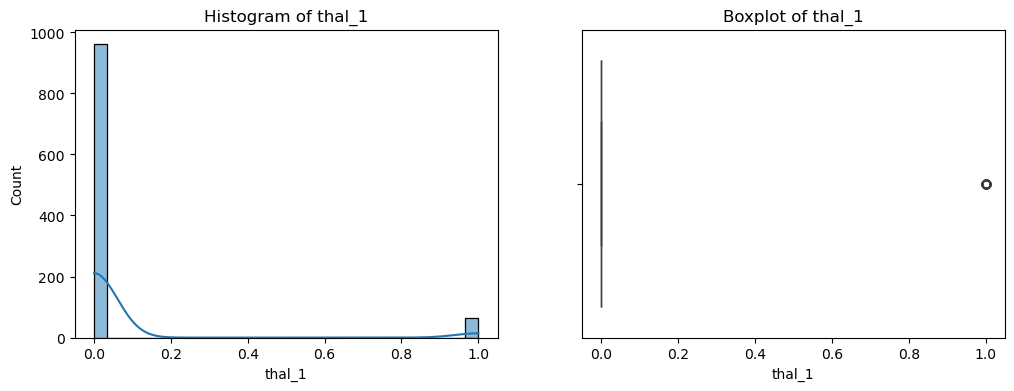

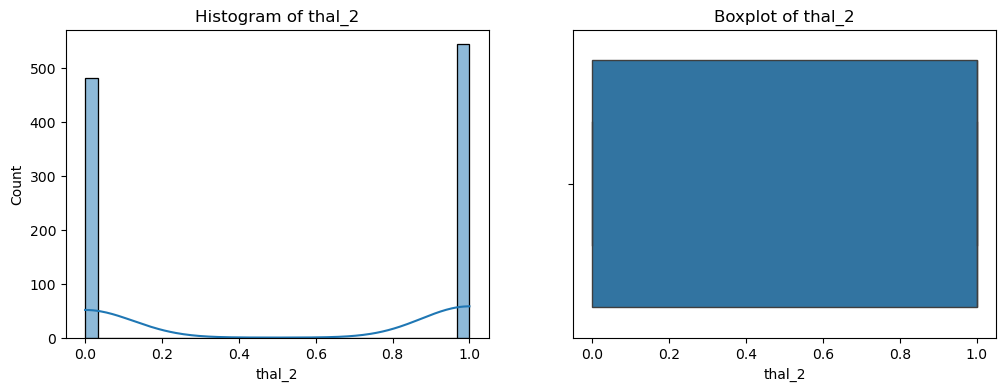

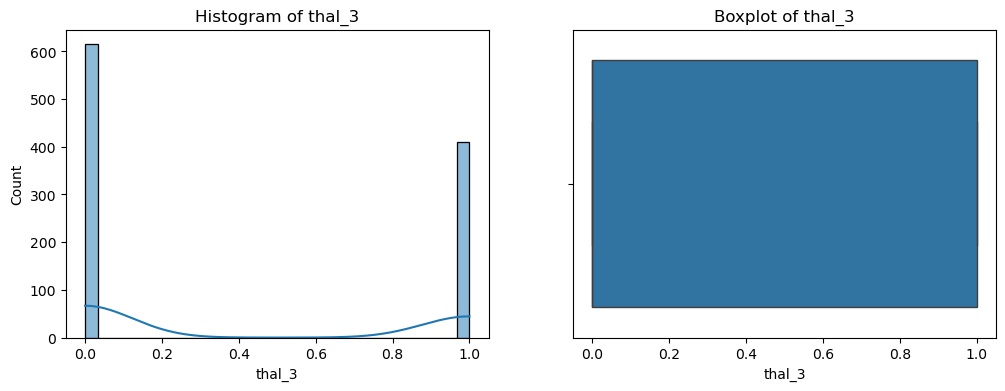

In [6]:
# 3. Histograms & Boxplots
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()

In [7]:
# 4. Feature Importance Plot
X = df.drop(columns=["target"])
y = df["target"]

In [8]:
# Train Decision Tree for feature importance
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

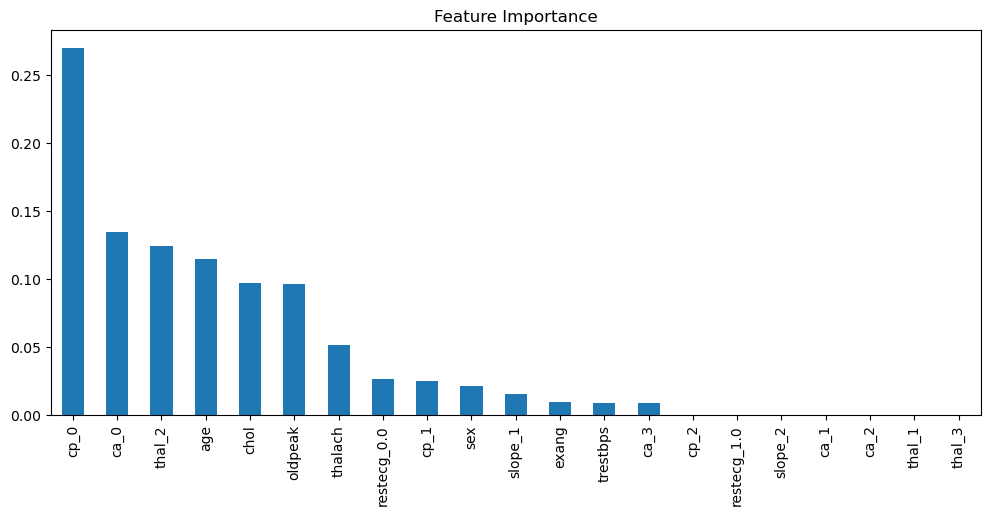

In [9]:
# Plot Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), title="Feature Importance")
plt.show()